In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000906465"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000906465
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,QCR HOLDINGS INC
Ticker,QCRH


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,28.0,1.956964e+01,5.618293e+00,12.22,1.521750e+01,1.847500e+01,2.329750e+01,31.0
interest income,42.0,2.527190e+07,9.558832e+06,14869000.00,1.958750e+07,2.115200e+07,2.609100e+07,52703000.0
net income,42.0,4.780643e+06,3.501831e+06,-524000.00,2.240000e+06,3.814000e+06,6.757750e+06,13316000.0
net interest income,42.0,1.915245e+07,8.558974e+06,7117000.00,1.385950e+07,1.693050e+07,2.297550e+07,39593000.0
provision for loan losses,42.0,1.808905e+06,1.051648e+06,352000.00,1.114750e+06,1.609500e+06,2.126750e+06,6206000.0


# Plots

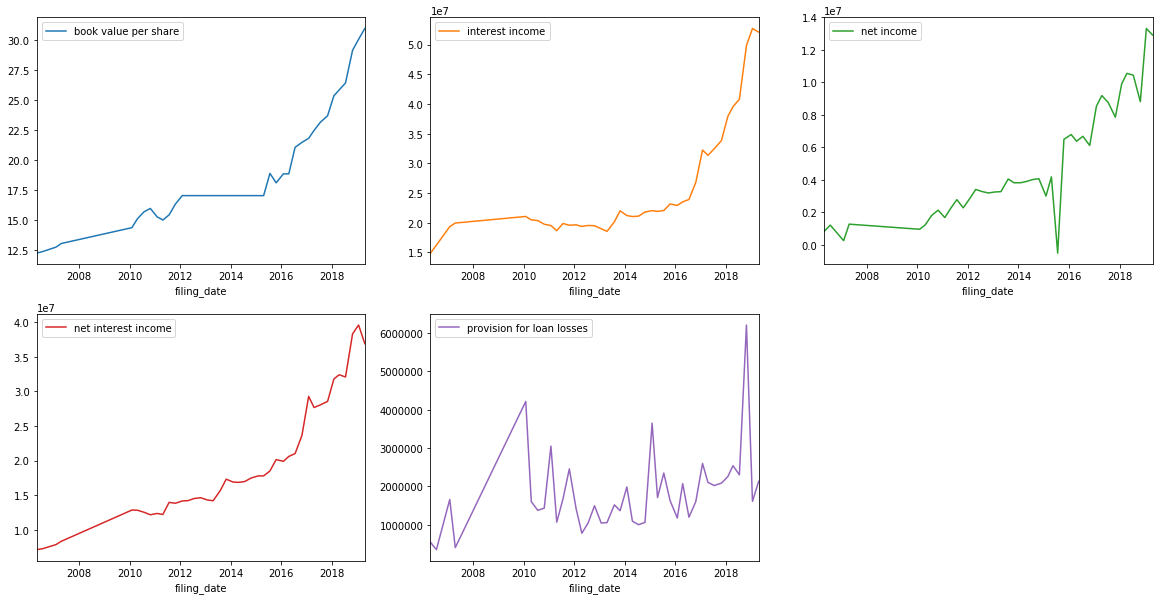

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000906465 book value per share                             2006Q3  missing   
           book value per share       2007Q2 to 2009Q3: 10 periods  missing   
           book value per share       2012Q1 to 2014Q4: 12 periods  missing   
           book value per share        2015Q4 to 2016Q1: 2 periods  missing   
           interest income                                  2006Q3  missing   
           interest income            2007Q2 to 2009Q3: 10 periods  missing   
           net income                                       2006Q3  missing   
           net income                 2007Q2 to 2009Q3: 10 periods  missing   
           net interest income                              2006Q3  missing   
           net interest income        2007Q2 to 2009Q3: 10 periods  missing   
           provision for loan losses                        2006Q3  missing   
           provision for loan losses  2007Q2 to 2009Q3: 10 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0000906465 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()